Summary: We develop a linear regression model for predicting car prices based on their milage and age. These are our independent variables and the price is the target variable. The use of a linear regression seems logicl as the target changes almost lineary with either of independent variables.

We will use sklearn to split the data into train and test sets. The "train" set is used to fit the model. The "test" set is used to evaluate the model.

My inspiration to prepare this code comes from this video:
https://www.youtube.com/watch?v=fwY9Qv96DJY

In [1]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data. Using oandas we load and convert our csv data to a dataframe.
# Note: You should proobably change the address given in the parentheses.
# By the way: df stands for Dataframe.
df = pd.read_csv('/content/carprices.csv')

In [3]:
# Let's view our small dataframe
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [4]:
# Let's now visualize the data, to find out if the use of a linear regression makes sence.

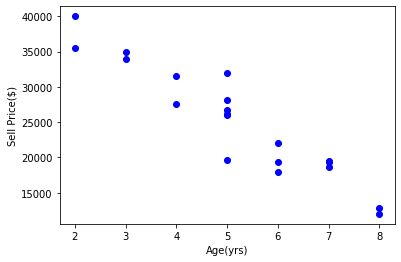

In [5]:
# First plotting the target variable as a function of "Age(yrs)"
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], c='b')
plt.ylabel('Sell Price($)')
plt.xlabel('Age(yrs)')
plt.show()

Text(0.5, 0, 'Mileage')

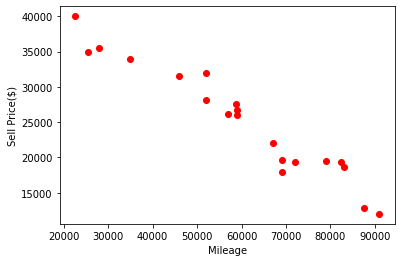

In [6]:
# Then plotting the target variable as a function of "Milage"
plt.scatter(df['Mileage'], df['Sell Price($)'], c='r')
plt.ylabel('Sell Price($)')
plt.xlabel('Mileage')

In [7]:
# Ok, it seems a linear regression is a reasonable choice of modeling.
# We already know what is the target variale and what are the independent variable.
# But python doesn't know it --yet. 
# We call our independt variables X and the targer variable y
# So now we define these as follows:

In [8]:
X=df[['Mileage', 'Age(yrs)']]
y=df['Sell Price($)']

In [9]:
# Just to make sure the codes is correct, let us see the datasets by our own eyes:

In [10]:
X.head(3)

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5


In [11]:
y.head(3)

0    18000
1    34000
2    26100
Name: Sell Price($), dtype: int64

In [12]:
# Note: Perhaps not highly relevant to mention this,
# but X is a dataframe and y is a series. Check these out: 

In [13]:
type(X)

pandas.core.frame.DataFrame

In [14]:
type(y)

pandas.core.series.Series

In [15]:
# Now let's split the data to train and test datasets. The sklearn module
# does all the job for us. We just need to point it to the data and tell
# it how much of the data is to be used as test datasets. This is 20% to 30%.
# I choose 25%

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# the following command produces two datasets for X and two data sets for y:
# train_test_split(X, y, test_size = 0.25)
# This means 15 observations are used as training data and 5 observations as test data.
# We names these X_train and X_test for the X dataset
# and y_train and y_test for the y dataset.
# The entire code is this (note the right order):

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [19]:
# Hnit: The use of random_state = 2 ensure reproducablity of the train and test datasets. 
# Let's view these:

In [20]:
X_train

,Mileage,Age(yrs)
5,59000,5
3,22500,2
10,83000,7
1,35000,3
17,69000,5
7,72000,6
16,28000,2
14,82450,7
2,57000,5
11,79000,7


In [21]:
print('Length of X_trian is', len(X_train))

Length of X_trian is 15


In [22]:
X_test

,Mileage,Age(yrs)
12,59000,5
4,46000,4
18,87600,8
0,69000,6
9,67000,6


In [23]:
print('Length of X_test is', len(X_test))

Length of X_test is 5


In [24]:
y_train

5     26750
3     40000
10    18700
1     34000
17    19700
7     19300
16    35500
14    19400
2     26100
11    19500
6     32000
19    28200
13    27500
15    35000
8     12000
Name: Sell Price($), dtype: int64

In [25]:
print('Length of X_trian is', len(y_train))

Length of X_trian is 15


In [26]:
y_test

12    26000
4     31500
18    12800
0     18000
9     22000
Name: Sell Price($), dtype: int64

In [27]:
print('Length of X_test is', len(y_test))

Length of X_test is 5


In [28]:
# Now that we have everything prepared, we can fit a regression model.
# This requires the "LinearRegression" class:

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# We call our model (i.e. our linear classifier) linreg as an object of the LinearRegression class:

In [31]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [32]:
# If you are wondering how the model looks like, rund this command:

In [33]:
print(linreg.intercept_, linreg.coef_, linreg.score(X, y))

46380.746837568164 [ -0.36831681 229.04103193] 0.9300503805131017


In [34]:
# I believe linreg.score gives the R2. I am not sure of this.

In [35]:
# Ok, so our model is now trained. We make some predictions.
# We can also find out how good the predictions are (i.e., how good the model is).
# For this, we feed the model with the test data (i.e. X_test) and compare the predicted 
# target values (y_pred) with the actual target values (y_test).

In [36]:
y_pred = linreg.predict(X_test)

In [37]:
print(y_pred)

[25795.26018807 30354.33769036 15948.52250859 22341.13311676
 23077.76673741]


In [38]:
# Now to eveluate how good the predictions are we should some sort of a metric.
# There are various error measurement methods including the followings:

1. R Squared
2. Mean Square Error(MSE)/Root Mean Square Error(RMSE)
3. Mean Absolute Error(MAE)

In [39]:
# More on this you can find there:

https://medium.com/@cmukesh8688/evaluation-of-linear-regression-model-6e8edbb068f

In [40]:
# Python can calculate these metrics for us. All need is importing a module and few lines of codes:

In [41]:
# Python can calculate these metrics for us. All need is importing a module and few lines of codes:

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [43]:
R2 = round(r2_score(y_test, y_pred), 4)
MSE = round(mean_squared_error(y_test, y_pred), 1)
RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)), 1)
MAE = round(mean_absolute_error(y_test, y_pred), 1)

In [44]:
print('R Square:', R2)
print()
print('MSE:', MSE)
print('RMSE:', RMSE)
print()
print('MAE:', MAE)

R Square: 0.8488

MSE: 6254934.5
RMSE: 2501.0

MAE: 1983.6


In [45]:
# R2 = 85% means that 85% of the variance of the target variable 
# is explained by the variance of the independent variable. A value
# higher than 85% might be considered good enough for our linear regression model.

In [46]:
# All other error metrics are more useful, when comparing multiple models.
# We have only one so maybe we should not worry about them.
# The RMSE says the weighted average error between the  predicted prices and actual 
# prices in is $2501, which is probably a good value given that 
# the average price in the dataset is $25197.5
# This applied to the MAE of $1984 as well.

In [47]:
df['Sell Price($)'].mean()

25197.5